<a href="https://colab.research.google.com/github/umiSirya/General-Data-analysis/blob/main/WorldHappiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import pyogrio

In [ ]:
# get geojson url
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_sovereignty.geojson"
gdf = gpd.read_file(url) # load geojson data
gdf # display some basic information

,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 sovereignty,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 sovereignty,"POLYGON ((20.59025 41.8554, 20.46318 41.51509,..."
3,1,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,0,...,Asia,Western Asia,Middle East & North Africa,20,20,6,-99,1,Admin-0 sovereignty,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,1,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,0,...,Oceania,Melanesia,East Asia & Pacific,7,7,4,2,1,Admin-0 sovereignty,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518..."
167,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,...,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,Admin-0 sovereignty,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
168,1,2,South Africa,ZAF,0,2,Sovereign country,South Africa,ZAF,0,...,Africa,Southern Africa,Sub-Saharan Africa,12,12,5,-99,1,Admin-0 sovereignty,"POLYGON ((31.521 -29.25739, 31.32556 -29.40198..."
169,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,...,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,Admin-0 sovereignty,"POLYGON ((32.75938 -9.2306, 33.23139 -9.67672,..."


In [ ]:
world = pd.read_csv('/content/combined (World Happiness Data)_combined (1).csv', delimiter='\t')
world.head()

,Country,Region,reset filters,Year,Corruption Rank,Economy (GDP per Capita),Economy Rank,Freedom Rank,Freedom to make life choices,Generosity,Generosity Rank,Happiness Rank,Happiness Score,Health (Life Expectancy),Health Rank,Perception of Corruption,Social support,Social Support Rank
0,Switzerland,Western Europe,Reset Filters,2015,7.0,1.39651,7,2,0.66557,0.29678,43,1,7.587,0.94143,9,0.41978,1.34951,4
1,Iceland,Western Europe,Reset Filters,2015,60.0,1.30232,22,15,0.62877,0.43630,14,2,7.561,0.94784,7,0.14145,1.40223,1
2,Denmark,Western Europe,Reset Filters,2015,4.0,1.32548,19,7,0.64938,0.34139,29,3,7.527,0.87464,30,0.48357,1.36058,3
3,Norway,Western Europe,Reset Filters,2015,14.0,1.45900,5,1,0.66973,0.34699,26,4,7.522,0.88521,26,0.36503,1.33095,6
4,Canada,North America,Reset Filters,2015,16.0,1.32629,18,13,0.63297,0.45811,13,5,7.427,0.90563,18,0.32957,1.32261,7


In [ ]:
world1 = world.merge(gdf, how='inner', right_on='admin', left_on='Country')
world1.head()

,Country,Region,reset filters,Year,Corruption Rank,Economy (GDP per Capita),Economy Rank,Freedom Rank,Freedom to make life choices,Generosity,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,Switzerland,Western Europe,Reset Filters,2015,7.0,1.39651,7,2,0.66557,0.29678,...,Europe,Western Europe,Europe & Central Asia,11,11,6,-99,1,Admin-0 sovereignty,"POLYGON ((9.59423 47.52506, 9.63293 47.3476, 9..."
1,Iceland,Western Europe,Reset Filters,2015,60.0,1.30232,22,15,0.62877,0.43630,...,Europe,Northern Europe,Europe & Central Asia,7,7,7,-99,1,Admin-0 sovereignty,"POLYGON ((-14.5087 66.45589, -14.73964 65.8087..."
2,Denmark,Western Europe,Reset Filters,2015,4.0,1.32548,19,7,0.64938,0.34139,...,Europe,Northern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((12.69001 55.60999, 12.08999 54..."
3,Norway,Western Europe,Reset Filters,2015,14.0,1.45900,5,1,0.66973,0.34699,...,Europe,Northern Europe,Europe & Central Asia,6,6,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((28.16555 71.18547, 31.29342 70..."
4,Canada,North America,Reset Filters,2015,16.0,1.32629,18,13,0.63297,0.45811,...,Americas,Northern America,North America,6,6,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-63.6645 46.55001, -62.9393 46..."


In [ ]:
world1.columns

Index(['Country', 'Region', 'reset filters', 'Year', 'Corruption Rank',
       'Economy (GDP per Capita)', 'Economy Rank', 'Freedom Rank',
       'Freedom to make life choices', 'Generosity', 'Generosity Rank',
       'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)',
       'Health Rank', 'Perception of Corruption', 'Social support',
       'Social Support Rank', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3',
       'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_

In [ ]:
columnsToDrop = ['scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3',
       'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_a3_is', 'adm0_a3_us',
       'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un', 'subregion',
       'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart',
       'featureclass',]
world1.drop(columns=columnsToDrop, inplace=True)
world1

,Country,Region,reset filters,Year,Corruption Rank,Economy (GDP per Capita),Economy Rank,Freedom Rank,Freedom to make life choices,Generosity,Generosity Rank,Happiness Rank,Happiness Score,Health (Life Expectancy),Health Rank,Perception of Corruption,Social support,Social Support Rank,geometry
0,Switzerland,Western Europe,Reset Filters,2015,7.0,1.39651,7,2,0.66557,0.29678,43,1,7.587,0.94143,9,0.41978,1.34951,4,"POLYGON ((9.59423 47.52506, 9.63293 47.3476, 9..."
1,Iceland,Western Europe,Reset Filters,2015,60.0,1.30232,22,15,0.62877,0.43630,14,2,7.561,0.94784,7,0.14145,1.40223,1,"POLYGON ((-14.5087 66.45589, -14.73964 65.8087..."
2,Denmark,Western Europe,Reset Filters,2015,4.0,1.32548,19,7,0.64938,0.34139,29,3,7.527,0.87464,30,0.48357,1.36058,3,"MULTIPOLYGON (((12.69001 55.60999, 12.08999 54..."
3,Norway,Western Europe,Reset Filters,2015,14.0,1.45900,5,1,0.66973,0.34699,26,4,7.522,0.88521,26,0.36503,1.33095,6,"MULTIPOLYGON (((28.16555 71.18547, 31.29342 70..."
4,Canada,North America,Reset Filters,2015,16.0,1.32629,18,13,0.63297,0.45811,13,5,7.427,0.90563,18,0.32957,1.32261,7,"MULTIPOLYGON (((-63.6645 46.55001, -62.9393 46..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Yemen,Middle East and Northern Africa,Reset Filters,2019,90.0,0.28700,144,101,1.16300,0.10800,118,151,3.380,0.46300,129,0.07700,0.14300,148,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
708,Rwanda,Sub-Saharan Africa,Reset Filters,2019,2.0,0.35900,135,145,0.71100,0.21700,56,152,3.334,0.61400,108,0.41100,0.55500,21,"POLYGON ((30.4191 -1.13466, 30.81613 -1.69891,..."
709,Afghanistan,Southern Asia,Reset Filters,2019,143.0,0.35000,136,152,0.51700,0.15800,89,154,3.203,0.36100,144,0.02500,0.00000,156,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
710,Central African Republic,Sub-Saharan Africa,Reset Filters,2019,129.0,0.02600,155,156,0.00000,0.23500,48,155,3.083,0.10500,155,0.03500,0.22500,134,"POLYGON ((15.27946 7.42192, 16.10623 7.49709, ..."


In [ ]:
world1 = gpd.GeoDataFrame(world1, geometry='geometry')
#world1.head()

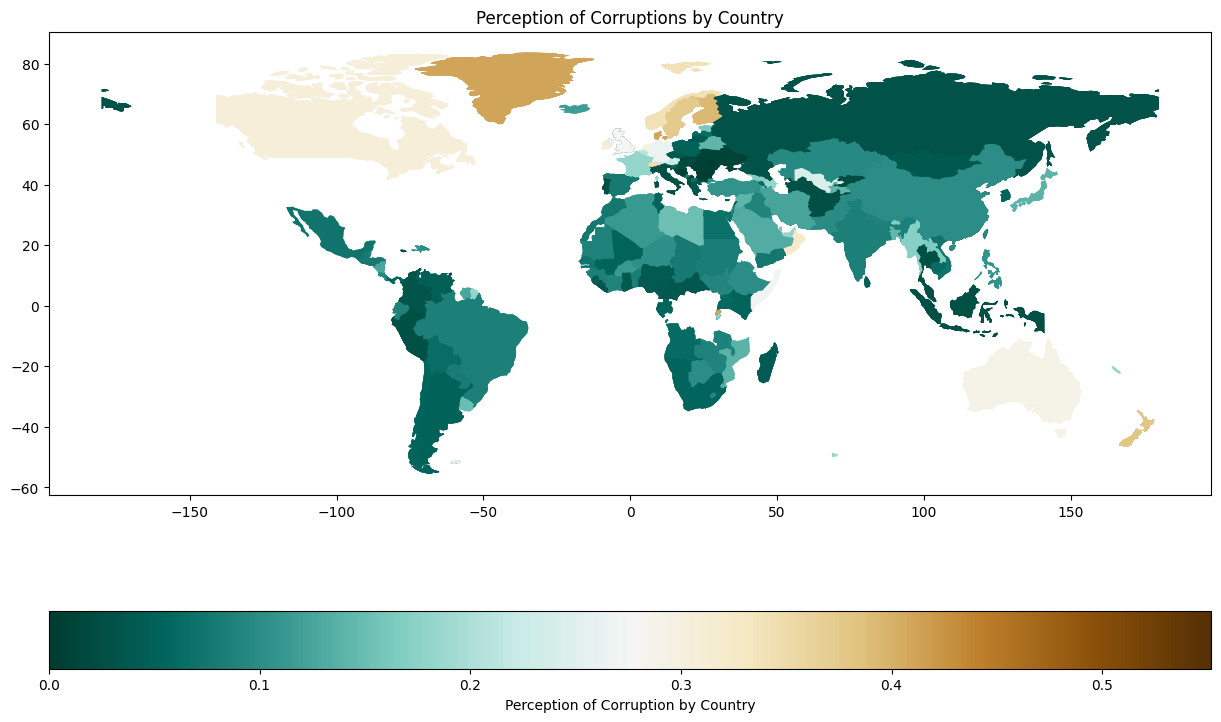

In [ ]:

fig, ax=plt.subplots(1,1, figsize=(15,10))
world1.plot(column='Perception of Corruption', ax=ax, legend=True, cmap='BrBG_r', legend_kwds={'label': "Perception of Corruption by Country",
                                                                                      'orientation': "horizontal"})
plt.title('Perception of Corruptions by Country')
plt.show()

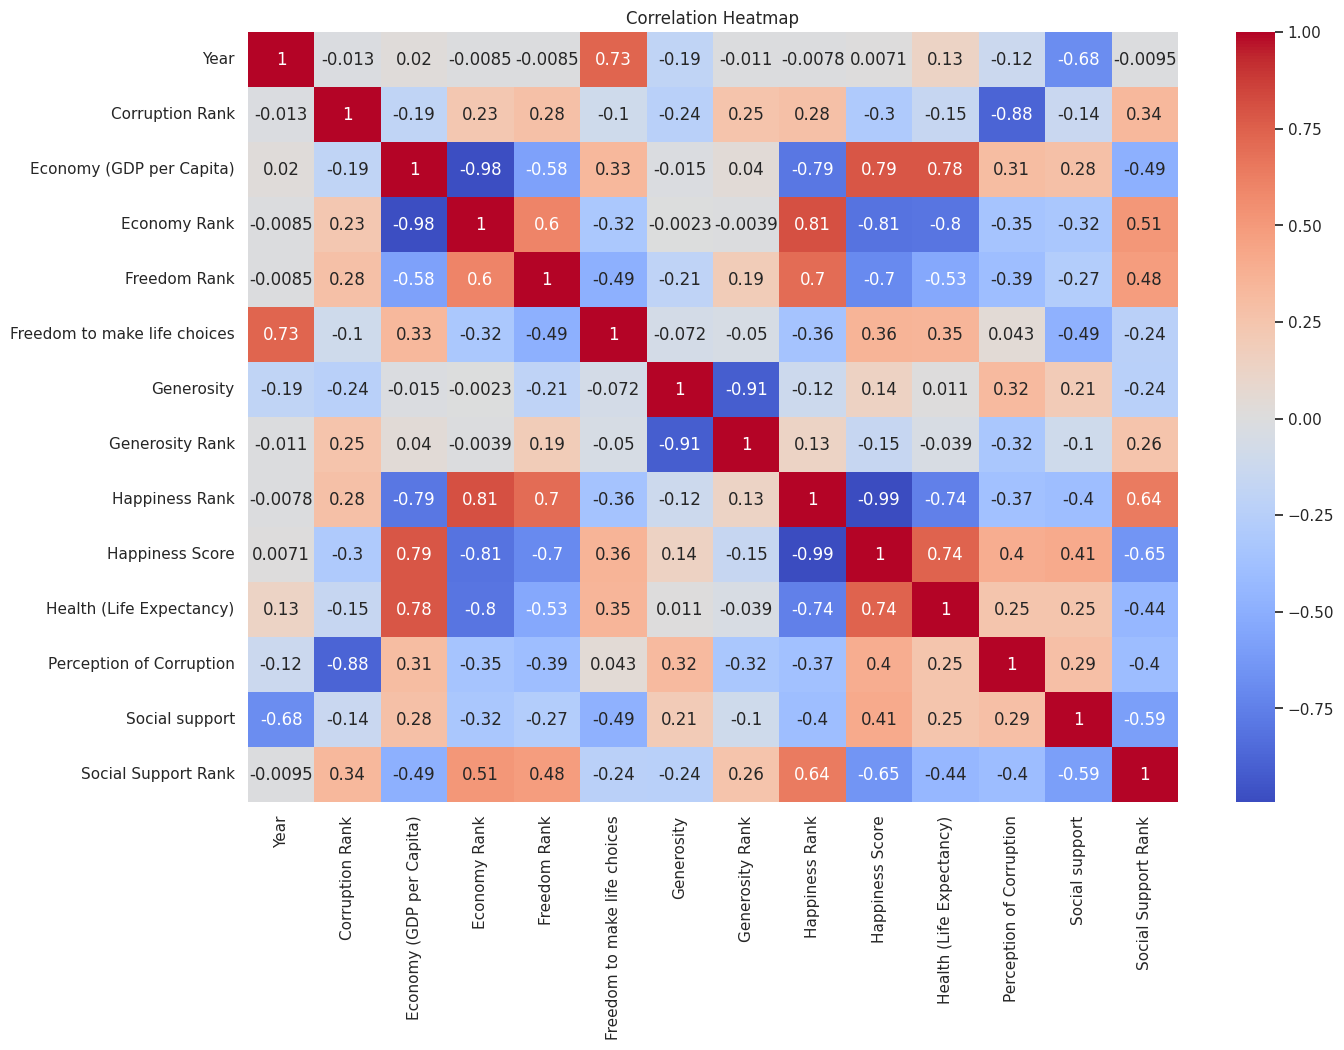

In [ ]:
#Select only numeric columns for correlation
world_happiness_numeric = world.select_dtypes(include=['float64', 'int64'])

#Heatmap to show correlation
plt.figure(figsize=(15, 10))
sns.heatmap(world_happiness_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Define a custom color palette
custom_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

# Create a box plot with custom colors for each region
fig = px.box(
    world,
    x="Region",
    y="Happiness Score",
    title="World Happiness Score by Region",
    color="Region",  # Set color by "Region" to apply custom colors
    color_discrete_sequence=custom_colors  # Apply the custom color palette
)

# Update layout for readability
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Happiness Score",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    width=900,
    height=600
)

# Show the plot
fig.show()


Here are some factors that may affect happiness in different regions:

1. Western Europe

Economic Stability: High GDP per capita and robust welfare systems.
Social Support: Strong social safety nets and healthcare access.
Work-Life Balance: Prioritization of leisure and shorter work hours.
Political Stability: Low corruption and effective governance.

2. North America

Income and Wealth: High living standards and economic opportunities.
Freedom and Individual Rights: Strong emphasis on personal freedoms.
Health: Access to healthcare, though disparities exist.
Social Inequality: Rising income inequality and social polarization.

3. Australia and New Zealand

Quality of Life: High quality of healthcare, education, and environmental factors.
Social Support: Strong community bonds and government support.
Natural Environment: Abundance of natural beauty, promoting mental well-being.

4. Middle East and North Africa

Political Instability: Conflicts, war, and political turmoil.
Social Restrictions: Limited freedoms in some countries.
Economic Disparities: High wealth inequality despite resource-rich economies.
Youth Unemployment: High levels of unemployment among young people.

5. Latin America and Caribbean

Social Ties: Strong family and community bonds.
Economic Challenges: Income inequality and economic instability.
Violence and Crime: High crime rates in certain regions affecting security.
Optimism: Culturally positive outlook despite challenges.

6. Southern Asia

Poverty: Widespread poverty and income inequality.
Education and Healthcare: Limited access to quality education and healthcare.
Cultural Values: Strong community and family structures.
Political Instability: Corruption and governance issues in some countries.

7. Central and Eastern Europe

Transition Economies: Struggles transitioning from communism to market economies.
Social Trust: Lower trust in institutions and government.
Economic Challenges: Unemployment and income disparities.
Aging Population: Demographic decline and lack of support for the elderly.

8. Eastern Asia

Economic Growth: Rapid economic development, especially in China.
Work Pressure: High-stress environments and long working hours.
Social Harmony: Emphasis on societal cohesion and family.
Mental Health: Growing concerns over mental health and well-being.

9. Sub-Saharan Africa

Poverty and Unemployment: High poverty rates and lack of job opportunities.
Health Issues: Prevalence of diseases like malaria and HIV/AIDS.
Political Instability: Conflicts, corruption, and poor governance.
Community Ties: Strong sense of community and social support.

10. Southern Asia

Economic Inequality: Wide income disparities and poverty.
Education and Gender Disparities: Challenges in access to education and gender inequality.
Social Structures: Strong family and religious values.
Political Issues: Corruption and social unrest affecting stability.

These factors interact in complex ways to influence overall happiness and well-being in each region

In [ ]:
# Filter for latin countries
latin_countries = world[world['Region'] == 'Latin America and Caribbean']
latin_countries

,Country,Region,reset filters,Year,Corruption Rank,Economy (GDP per Capita),Economy Rank,Freedom Rank,Freedom to make life choices,Generosity,Generosity Rank,Happiness Rank,Happiness Score,Health (Life Expectancy),Health Rank,Perception of Corruption,Social support,Social Support Rank
11,Costa Rica,Latin America and Caribbean,Reset Filters,2015,81.0,0.95578,74,12,0.63376,0.25497,55,12,7.226,0.86027,33,0.10583,1.23788,32
13,Mexico,Latin America and Caribbean,Reset Filters,2015,31.0,1.02054,63,63,0.48181,0.14074,122,14,7.187,0.81444,38,0.21312,0.91451,108
15,Brazil,Latin America and Caribbean,Reset Filters,2015,42.0,0.98124,70,57,0.49049,0.14574,120,16,6.983,0.69702,79,0.17521,1.23287,35
22,Venezuela,Latin America and Caribbean,Reset Filters,2015,77.0,1.04424,58,83,0.42908,0.05841,153,23,6.810,0.72052,73,0.11069,1.25596,28
24,Panama,Latin America and Caribbean,Reset Filters,2015,88.0,1.06353,53,43,0.54210,0.24434,61,25,6.786,0.79661,43,0.09270,1.19850,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Paraguay,Latin America and Caribbean,Reset Filters,2019,83.0,0.85500,92,30,1.47500,0.18400,76,63,5.743,0.77700,84,0.08000,0.51400,35
690,Peru,Latin America and Caribbean,Reset Filters,2019,140.0,0.96000,78,78,1.27400,0.08300,130,65,5.697,0.85400,50,0.02700,0.45500,61
702,Dominican Republic,Latin America and Caribbean,Reset Filters,2019,57.0,1.01500,71,55,1.40100,0.11300,114,77,5.425,0.77900,83,0.10100,0.49700,44
733,Venezuela,Latin America and Caribbean,Reset Filters,2019,117.0,0.96000,78,49,1.42700,0.06400,145,108,4.707,0.80500,74,0.04700,0.15400,146


In [ ]:
latin_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 11 to 772
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       111 non-null    object 
 1   Region                        111 non-null    object 
 2   reset filters                 111 non-null    object 
 3   Year                          111 non-null    int64  
 4   Corruption Rank               111 non-null    float64
 5   Economy (GDP per Capita)      111 non-null    float64
 6   Economy Rank                  111 non-null    int64  
 7   Freedom Rank                  111 non-null    int64  
 8   Freedom to make life choices  111 non-null    float64
 9   Generosity                    111 non-null    float64
 10  Generosity Rank               111 non-null    int64  
 11  Happiness Rank                111 non-null    int64  
 12  Happiness Score               111 non-null    float64
 13  Health (L

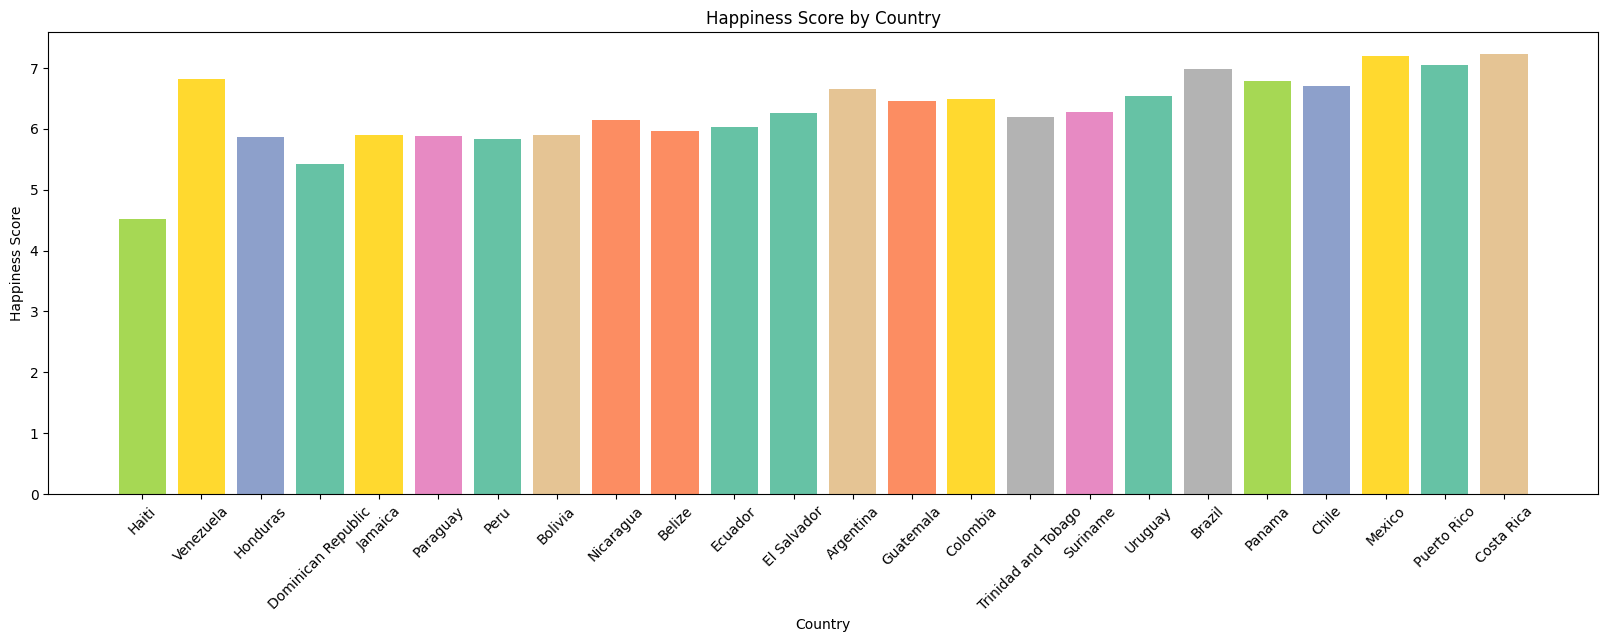

In [ ]:
# Sort the DataFrame by 'Happiness Score' in descending order
latin_countries = latin_countries.sort_values(by='Happiness Score', ascending=True)

# Set up the plot
plt.figure(figsize=(20, 6))

# Use a color palette from Seaborn to assign a unique, pleasing color for each country
colors = sns.color_palette("Set2", len(latin_countries))

# Plot the bar graph with unique colors for each bar
plt.bar(latin_countries['Country'], latin_countries['Happiness Score'], color=colors)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

In [ ]:
# Filter the data for Latin and Carribean countries only
latin_countries= world1[world1['Region'].isin(['Latin America and Caribbean'])].drop_duplicates(subset='Country')


# Sort the countries by Happiness Score in descending order
sorted_latin_countries = latin_countries.sort_values(by='Happiness Score', ascending=False)

# Get the top 3 happiest countries
top_3_happiest_latin_countries = sorted_latin_countries[['Country', 'Happiness Score']].head(3)

## Get the least 3 happiest countries
least_happiest_latin_countries = sorted_latin_countries[['Country', 'Happiness Score']].tail(3)


In [ ]:
df = pd.DataFrame(top_3_happiest_latin_countries)

# Create the bar plot using Plotly Express
fig = px.bar(
    df,
    x="Happiness Score",
    y="Country",
    orientation="h",
    title="Top 3 Happiest Latin American Countries",
    color="Country",  # Use the Country column to assign different colors
    color_discrete_sequence=px.colors.qualitative.Set3  # A predefined color sequence
)

# Show the plot
fig.show()



In [21]:
df = pd.DataFrame(least_happiest_latin_countries )

# Create the bar plot using Plotly Express
fig = px.bar(
    df,
    x="Happiness Score",
    y="Country",
    orientation="h",
    title="Least Happiest Latin American Countries",
    color="Country",  # Use the Country column to assign different colors
    color_discrete_sequence=px.colors.qualitative.Set3  # A predefined color sequence
)

# Show the plot
fig.show()

This horizontal bar chart presents the happiness scores of the three happiest Latin American countries: Costa Rica, Mexico, and Brazil. The scores indicate the overall happiness levels in these countries, with Costa Rica having the highest score, followed closely by Mexico and then Brazil.

Costa Rica’s high score highlights its reputation for a positive quality of life and well-being. Mexico, in the middle, suggests a strong sense of community and resilience. Brazil, while slightly lower than the other two, still maintains a significant happiness score, reflecting the lively culture and social connections that contribute to the happiness of its people.

The similarity in scores (all close to 7) suggests that these three countries share some common positive attributes contributing to happiness, such as community bonds, cultural richness, and, likely, environmental factors.

In [ ]:
# Sort the data by Happiness Score in ascending order (lowest happiness score first)
happy_countries = latin_countries.sort_values(by='Happiness Score', ascending=False).head(3)

# Melt the data for the selected least happy countries
melted_data = happy_countries.melt(
    id_vars=['Country'],
    value_vars=['Economy (GDP per Capita)', 'Perception of Corruption', 'Freedom to make life choices'],
    var_name='Factor',
    value_name='Score'
)

# Create the interactive bar plot with a pleasant color palette
fig = px.bar(
    melted_data,
    x='Country',
    y='Score',
    color='Factor',
    barmode='group',
    title='Comparison of Key Factors Contributing to Happiness in the Least Happiest Latin American Countries',
    labels={'Score': 'Score', 'Country': 'Country'},
    color_discrete_sequence=px.colors.qualitative.Pastel  # Added a soft color palette
)

# Update layout for readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Score',
    legend_title='Happiness Factors'
)

# Show the interactive plot
fig.show()

This bar chart compares three key factors that contribute to happiness in Costa Rica, Mexico, and Brazil: **Economy (GDP per Capita)**, **Perception of Corruption**, and **Freedom to Make Life Choices**. Each factor's score indicates its impact on the overall happiness in each country.

### Analysis:
1. **Economy (GDP per Capita)**:
   - All three countries have high scores for economic factors, with Mexico showing the highest.
   - This suggests that economic stability or GDP per capita is a significant contributor to the happiness of these populations, as financial well-being is linked to access to resources, healthcare, and quality of life.

2. **Perception of Corruption**:
   - This factor scores the lowest across all three countries, indicating a high perception of corruption.
   - Corruption perception negatively affects happiness, as it leads to a lack of trust in institutions and governance, which can diminish people’s confidence in societal fairness and justice.

3. **Freedom to Make Life Choices**:
   - Costa Rica and Mexico score relatively high in terms of personal freedom, suggesting that people in these countries feel they have control over their life choices, contributing to a sense of autonomy and satisfaction.
   - Brazil scores lower in this category, possibly impacting the overall happiness level in the country. A lower sense of personal freedom might reflect challenges in political stability, social policies, or economic opportunities.

### Conclusion:
The chart indicates that while economic stability is strong in these countries, the perception of corruption is a major challenge. Additionally, the sense of freedom to make life choices varies, with Brazil experiencing lower freedom compared to Costa Rica and Mexico. This balance of economic factors, governance trust, and personal freedom significantly shapes the happiness levels in these Latin American countries.

In [ ]:
# Create the interactive bar plot with a more pleasant color palette
fig = px.bar(
    melted_data,
    x='Country',
    y='Score',
    color='Factor',
    barmode='group',
    title='Comparison of Key Factors Contributing to Happiness the Least Happiest Latin American Countries',
    labels={'Score': 'Score', 'Country': 'Country'},
    color_discrete_sequence=px.colors.qualitative.Pastel  # New color palette for a softer look
)

# Update layout for readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Score',
    legend_title='Happiness Factors'
)

# Show the interactive plot
fig.show()


1. **GDP per Capita**: While Costa Rica, Mexico, and Brazil have moderate GDP per capita levels compared to other Latin American countries, income inequality remains a challenge. This limits access to opportunities and services, impacting people’s overall satisfaction and quality of life.

2. **Perception of Corruption**: Corruption perceptions are high in all three countries, which erodes public trust in institutions. In Brazil and Mexico especially, citizens often feel their governments misuse resources and fail to address critical needs, diminishing people’s optimism and sense of fairness.

3. **Freedom to Make Life Choices**: Costa Rica typically ranks higher in perceived freedom compared to Mexico and Brazil due to its stability and social policies, which encourage individual choice. In Brazil and Mexico, however, high crime rates and economic pressures restrict personal freedom, limiting people’s ability to make fulfilling life choices. This difference influences happiness, as freedom is strongly linked to a sense of control over one’s life.

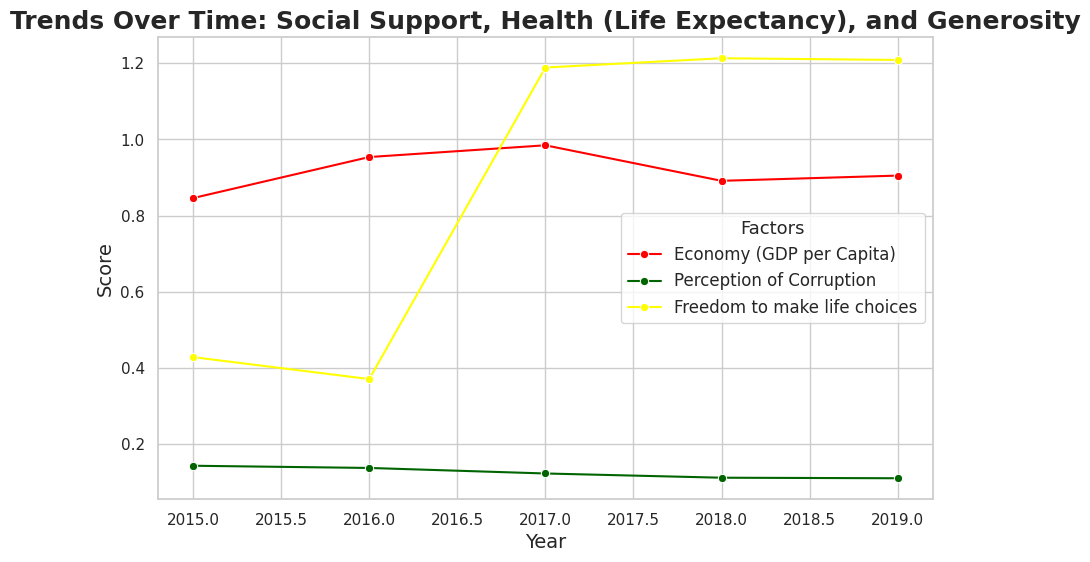

In [ ]:

# Set the theme
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Plot each factor as a separate line
sns.lineplot(x='Year', y='Economy (GDP per Capita)', data=world, label='Economy (GDP per Capita)', color='red', marker='o', errorbar = None)
sns.lineplot(x='Year', y='Perception of Corruption', data=world, label='Perception of Corruption', color='darkgreen', marker='o', errorbar = None)
sns.lineplot(x='Year', y='Freedom to make life choices', data=world, label='Freedom to make life choices', color='yellow', marker='o', errorbar = None)

# Add title and labels
plt.title('Trends Over Time: Social Support, Health (Life Expectancy), and Generosity', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Customize the legend
plt.legend(title='Factors', fontsize=12, title_fontsize='13')

# Show the plot
plt.show()

In [ ]:
latin_countries.columns

Index(['Country', 'Region', 'reset filters', 'Year', 'Corruption Rank',
       'Economy (GDP per Capita)', 'Economy Rank', 'Freedom Rank',
       'Freedom to make life choices', 'Generosity', 'Generosity Rank',
       'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)',
       'Health Rank', 'Perception of Corruption', 'Social support',
       'Social Support Rank', 'geometry'],
      dtype='object')